In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"../data/retail_price.csv")

In [3]:
data.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [4]:
data["product_category_name"].value_counts()

garden_tools             160
health_beauty            130
watches_gifts            103
computers_accessories     69
bed_bath_table            61
cool_stuff                57
furniture_decor           48
perfumery                 26
consoles_games            22
Name: product_category_name, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [6]:
data["product_id"].value_counts()

health7       20
health5       20
bed2          19
garden1       18
garden3       18
computers4    18
health9       18
garden2       17
health8       17
watches1      17
garden9       17
bed1          16
garden10      16
garden7       16
garden6       16
watches3      15
cool1         15
watches2      15
computers1    15
watches6      14
garden4       14
garden5       14
garden8       14
perfumery2    13
cool2         13
furniture1    13
perfumery1    13
health2       13
furniture2    13
cool5         13
watches7      12
consoles1     12
furniture3    12
bed3          11
health4       11
computers3    10
watches8      10
consoles2     10
computers2    10
watches5      10
watches4      10
furniture4    10
bed4          10
cool4          9
health1        9
computers6     8
computers5     8
health3        8
health6        7
health10       7
cool3          7
bed5           5
Name: product_id, dtype: int64

[]

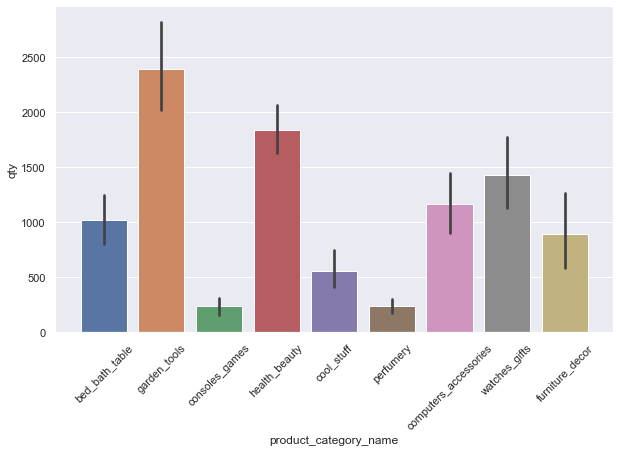

In [7]:
#product category vs total sales over the period of
sns.set_theme(palette = "rocket", style = "darkgrid",)
sns.color_palette("rocket")
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x = "product_category_name", y= "qty", data = data, estimator= sum, )
plt.xticks(rotation = 45)
plt.plot()

In [8]:
data["product_category_name"].unique()

array(['bed_bath_table', 'garden_tools', 'consoles_games',
       'health_beauty', 'cool_stuff', 'perfumery',
       'computers_accessories', 'watches_gifts', 'furniture_decor'],
      dtype=object)

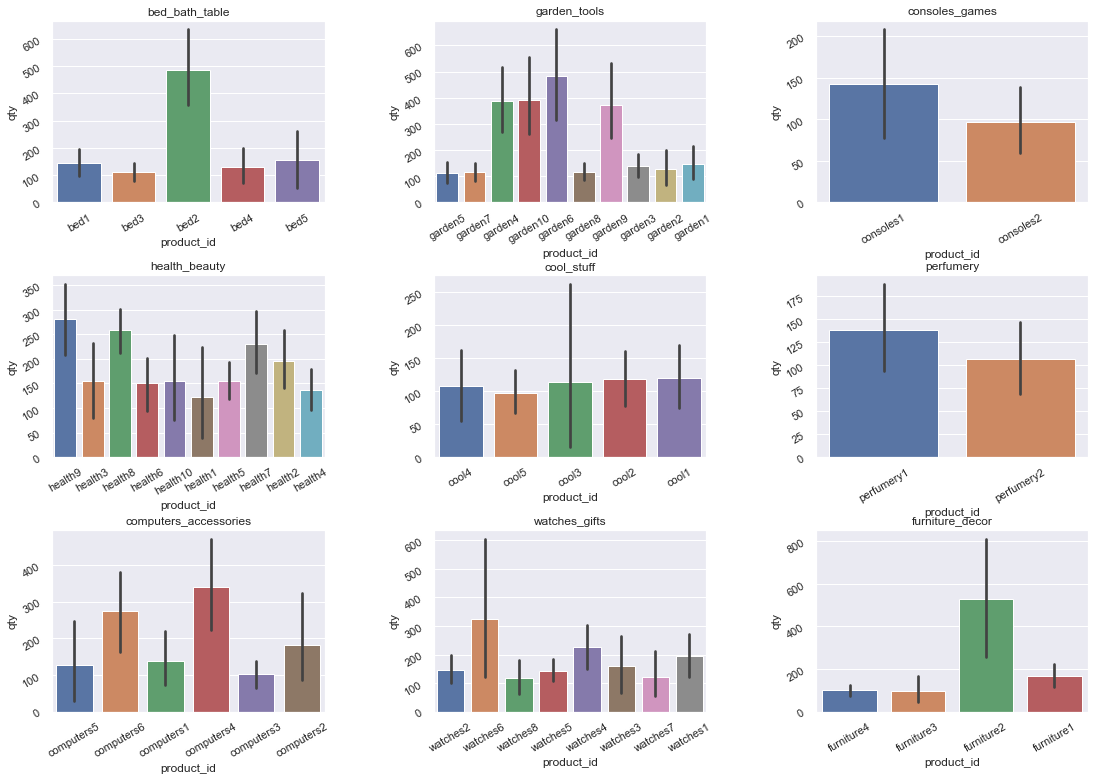

In [9]:
  # sourcery skip: avoid-builtin-shadow
fig, axes = plt.subplots(3,3, sharex = False , figsize = (18, 12))
for i,ax in zip (data["product_category_name"].unique(), axes.flat):
    df = data.where(data["product_category_name"] == i)
    sns.barplot(x = "product_id", y = "qty", data = df , estimator = sum, ax = ax)
    ax.tick_params(labelrotation=30)
    ax.set_title(i)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [10]:
#prod_per_cat(data, "product_category_name", "qty", "product_id")

In [11]:
#sales over time 
data["revenue"] = data["qty"]* data["unit_price"]

In [12]:
data.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,revenue
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90,45.95
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,137.85
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,275.70
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,183.80
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,91.90


In [13]:
#revenue over time
data["month_year"] = data["month_year"].str.replace("2017", "2020")
data["month_year"] = data["month_year"].str.replace("2018", "2021")

In [14]:
#data.head()

In [15]:
data["month_year"] = pd.to_datetime(data["month_year"], dayfirst = True)

In [16]:
data.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,revenue
0,bed1,bed_bath_table,2020-05-01,1,45.95,15.100000,45.95,39,161,2,...,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90,45.95
1,bed1,bed_bath_table,2020-06-01,3,137.85,12.933333,45.95,39,161,2,...,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95,137.85
2,bed1,bed_bath_table,2020-07-01,6,275.70,14.840000,45.95,39,161,2,...,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95,275.70
3,bed1,bed_bath_table,2020-08-01,4,183.80,14.287500,45.95,39,161,2,...,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95,183.80
4,bed1,bed_bath_table,2020-09-01,2,91.90,15.100000,45.95,39,161,2,...,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95,91.90


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   product_id                  676 non-null    object        
 1   product_category_name       676 non-null    object        
 2   month_year                  676 non-null    datetime64[ns]
 3   qty                         676 non-null    int64         
 4   total_price                 676 non-null    float64       
 5   freight_price               676 non-null    float64       
 6   unit_price                  676 non-null    float64       
 7   product_name_lenght         676 non-null    int64         
 8   product_description_lenght  676 non-null    int64         
 9   product_photos_qty          676 non-null    int64         
 10  product_weight_g            676 non-null    int64         
 11  product_score               676 non-null    float64       

[]

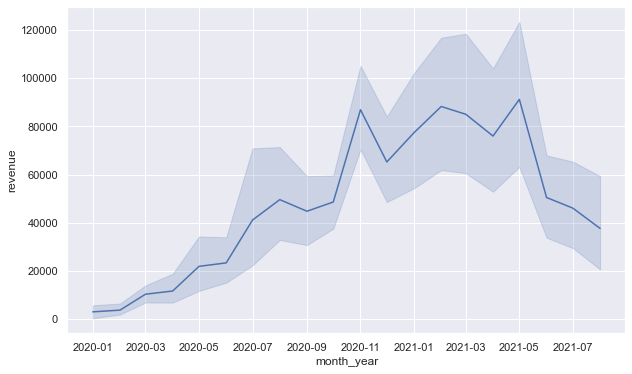

In [18]:
#revenue over time
sns.lineplot(x="month_year", y = "revenue", data = data, estimator = sum)
plt.plot()

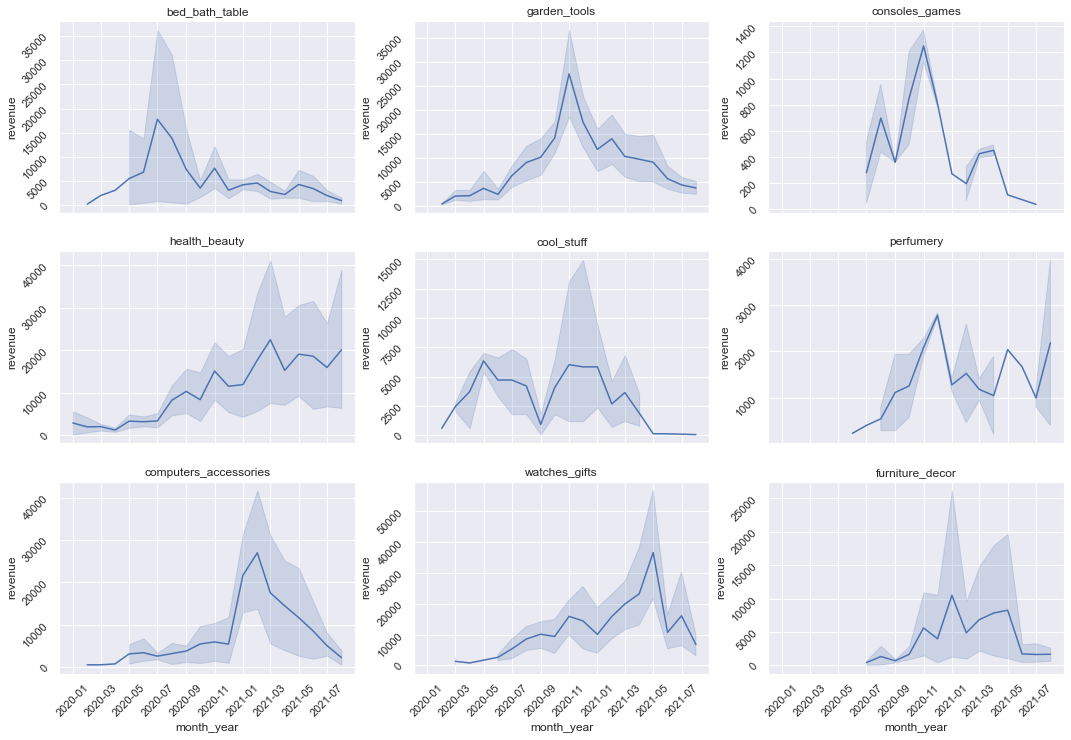

In [19]:
fig, axes = plt.subplots(3, 3, sharex = True, figsize = (18, 12))
for i, ax in zip(data["product_category_name"].unique(), axes.flat):
    df = data.where(data["product_category_name"] == i)
    sns.lineplot(x="month_year", y = "revenue", data = df, estimator = sum, ax = ax)
    #ax.set_xticks([1, 1, 1])
    ax.tick_params(labelrotation=45)
    ax.set_title(i)
plt.show()

Year-on-Year Growth, Month-on-Month Growth

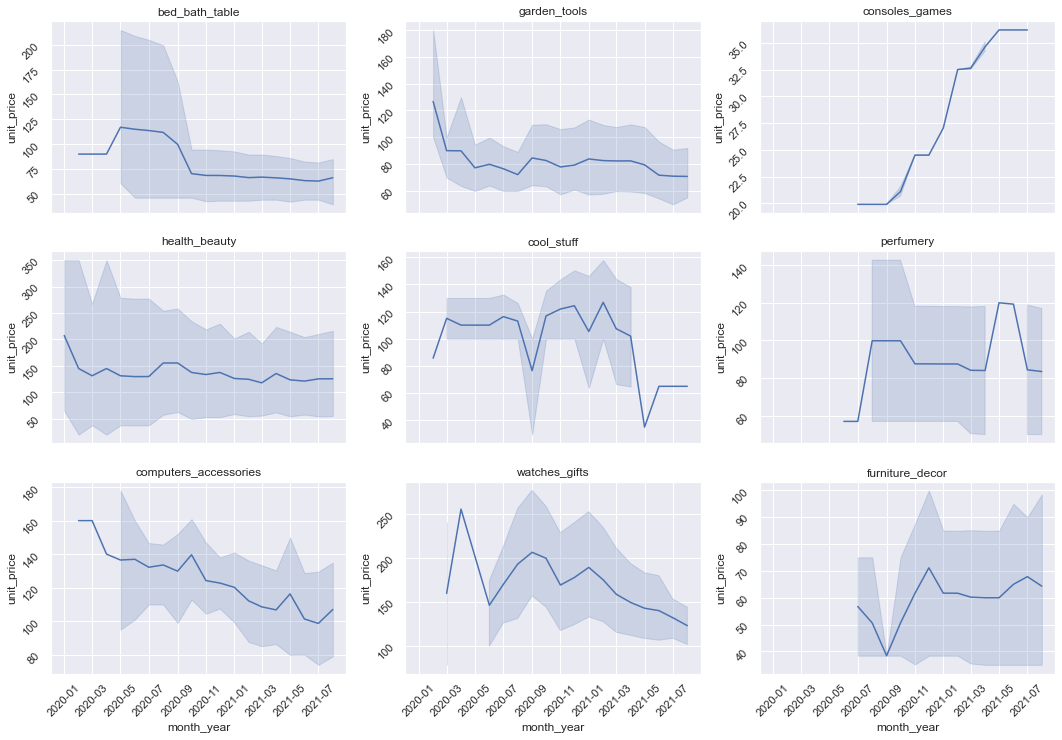

In [22]:
fig, axes = plt.subplots(3, 3, sharex = True, figsize = (18, 12))
for i, ax in zip(data["product_category_name"].unique(), axes.flat):
    df = data.where(data["product_category_name"] == i)
    sns.lineplot(x="month_year", y = "unit_price", data = df, ax = ax)
    #ax.set_xticks([1, 1, 1])
    ax.tick_params(labelrotation=45)
    ax.set_title(i)
plt.show()